In [1]:

import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
trans_data = pd.read_csv('/content/drive/MyDrive/data/eth_trans_data_clean.csv')

price_data_merged = pd.read_csv('/content/drive/MyDrive/data/price_data_merged_w_trans_count.csv', index_col = 'Date', parse_dates=True)

trans_data = trans_data.sample(frac=0.5, random_state=42)
trans_data.dropna(subset=['timeStamp', 'valueUSD','volatility', 'ethValusd',  'perc75_Neg_lag1', 'perc75_Neg_lag2', 'perc75_Neg_lag3', 'get_out_metric'],inplace=True)


In [3]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116906 entries, 198931 to 34434
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   blockNumber        116906 non-null  int64  
 1   timeStamp          116906 non-null  int64  
 2   hash               116906 non-null  object 
 3   nonce              116906 non-null  float64
 4   blockHash          116906 non-null  object 
 5   transactionIndex   116906 non-null  int64  
 6   from               116906 non-null  object 
 7   to                 116900 non-null  object 
 8   value              116906 non-null  float64
 9   gasPrice           116906 non-null  int64  
 10  isError            116906 non-null  int64  
 11  input              116906 non-null  object 
 12  contractAddress    116906 non-null  object 
 13  cumulativeGasUsed  116906 non-null  int64  
 14  gasUsed            116906 non-null  int64  
 15  confirmations      116906 non-null  int64  
 16

In [4]:
features = ['timeStamp', 'valueUSD','volatility', 'ethValusd',  'perc75_Neg_lag1', 'perc75_Neg_lag2', 'perc75_Neg_lag3', 'get_out_metric']


In [5]:
X = trans_data[features]
pca = PCA(n_components=3)
X.dropna(inplace=True)
reduced_data = pca.fit_transform(X)
ss = StandardScaler()
Reduced_scaled = ss.fit_transform(reduced_data)


<ipython-input-5-6c98d985bba6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [12]:
dbscan = DBSCAN(eps=0.3, min_samples=10, n_jobs=-1, algorithm='ball_tree')
labels = dbscan.fit_predict(Reduced_scaled)

In [13]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6}

In [14]:
trans_data['cluster_label'] = labels

In [15]:
silhouette_avg = silhouette_score(Reduced_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.42442995784280807


In [16]:
trans_data.to_csv('/content/drive/MyDrive/data/transaction_clustered.csv')

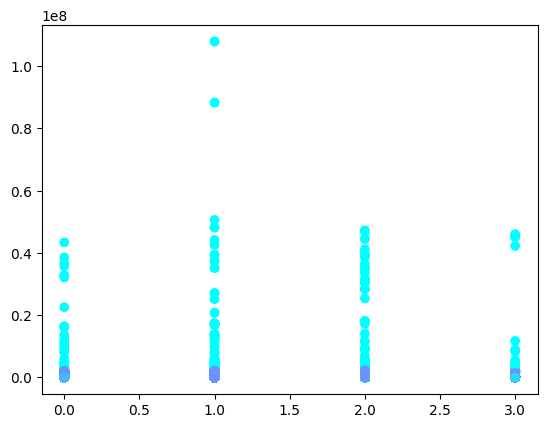

In [17]:
plt.scatter(X['get_out_metric'], X['valueUSD'], c=labels, cmap='cool', marker='o');


### Price Per Day Clustering
---

In [4]:
price_data_merged.head(3)

,Close,Close_1,Close_2,Close_3,Close_4,volatility,dayChange,perc75_Neg,perc75_Neg_lag1,perc75_Neg_lag2,...,0xfff3bab9846675b4fc000601c6865990881dff3d,0xfff401de598bd133cff26be5e79bbee4eed2a0e4,0xfff4520620130fd9dbd7dd0061f3d26eeb945c39,0xfff4f76587c7eadb970b3ffba1cc608882787a42,0xfff841e24c353cd97f6d29cbdc46fb0886217191,0xfffb40347816873ca038756cc87bc610144166b2,0xfffc7d6fa7bd44ebb5b132054c82ad6d23556b3b,0xfffc877a12b4d4a34b8fcf506c71b4a33d844330,0xffff2f58a7e875565b3889fce135300eaceb24ab,GENESIS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-27,2267.885986,2257.208740,2317.064209,2344.493652,2282.544434,71.736637,10.677246,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-26,2267.199707,2267.885986,2257.208740,2317.064209,2344.493652,58.942905,-0.686279,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-25,2217.710205,2267.199707,2267.885986,2257.208740,2317.064209,53.719713,-49.489502,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:


ss = StandardScaler()
price_scaled = ss.fit_transform(price_data_merged)


In [6]:
ss = StandardScaler()
price_scaled = ss.fit_transform(price_data_merged)

dbscan = DBSCAN(eps=0.3, min_samples=3, n_jobs=-1)
labels = dbscan.fit_predict(price_scaled)

In [7]:
silhouette_avg = silhouette_score(price_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

price_data_merged['cluster'] = labels


Silhouette Score: -0.36070180915505656


In [8]:
price_data_merged.columns

Index(['Close', 'Close_1', 'Close_2', 'Close_3', 'Close_4', 'volatility',
       'dayChange', 'perc75_Neg', 'perc75_Neg_lag1', 'perc75_Neg_lag2',
       ...
       '0xfff401de598bd133cff26be5e79bbee4eed2a0e4',
       '0xfff4520620130fd9dbd7dd0061f3d26eeb945c39',
       '0xfff4f76587c7eadb970b3ffba1cc608882787a42',
       '0xfff841e24c353cd97f6d29cbdc46fb0886217191',
       '0xfffb40347816873ca038756cc87bc610144166b2',
       '0xfffc7d6fa7bd44ebb5b132054c82ad6d23556b3b',
       '0xfffc877a12b4d4a34b8fcf506c71b4a33d844330',
       '0xffff2f58a7e875565b3889fce135300eaceb24ab', 'GENESIS', 'cluster'],
      dtype='object', length=30445)

In [9]:
price_data_merged.to_csv('/content/drive/MyDrive/data/price_data_merged_clustered.csv')


<Axes: xlabel='Date', ylabel='Close'>

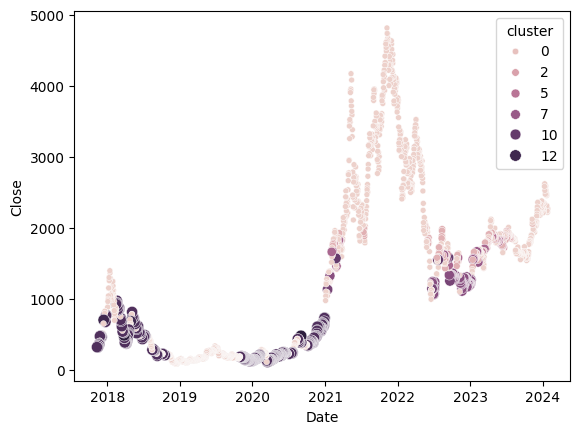

In [111]:
sns.scatterplot(x = price_data_merged.index, y = price_data_merged['Close'], data = price_data_merged, hue= 'cluster', size= 'cluster');

In [81]:
price_data_merged.shape

(2271, 30444)